In [45]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler


In [60]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier


In [2]:
from google.colab import files
uploaded = files.upload()

Saving hiring (1).csv to hiring (1).csv


In [15]:
df = pd.read_csv('/content/hiring (1).csv')

In [16]:
df.head()

,experience,test_score(out of 10),interview_score(out of 10),salary($)
0,NaN,8.0,9,50000
1,NaN,8.0,6,45000
2,five,6.0,7,60000
3,two,10.0,10,65000
4,seven,9.0,6,70000


In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8 entries, 0 to 7
Data columns (total 4 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   experience                  6 non-null      object 
 1   test_score(out of 10)       7 non-null      float64
 2   interview_score(out of 10)  8 non-null      int64  
 3   salary($)                   8 non-null      int64  
dtypes: float64(1), int64(2), object(1)
memory usage: 388.0+ bytes


In [18]:
df.isnull().sum()

,0
experience,2
test_score(out of 10),1
interview_score(out of 10),0
salary($),0


In [19]:
df.describe()

,test_score(out of 10),interview_score(out of 10),salary($)
count,7.000000,8.000000,8.00000
mean,7.857143,7.875000,63000.00000
std,1.345185,1.642081,11501.55269
min,6.000000,6.000000,45000.00000
25%,7.000000,6.750000,57500.00000
50%,8.000000,7.500000,63500.00000
75%,8.500000,9.250000,70500.00000
max,10.000000,10.000000,80000.00000


In [25]:
le = LabelEncoder()
for col in df.select_dtypes(include=['object']).columns:
    df[col] = le.fit_transform(df[col])


In [26]:
df

,experience,test_score(out of 10),interview_score(out of 10),salary($)
0,6,8.0,9,50000
1,6,8.0,6,45000
2,1,6.0,7,60000
3,5,10.0,10,65000
4,2,9.0,6,70000
5,4,7.0,10,62000
6,3,NaN,7,72000
7,0,7.0,8,80000


In [30]:
df.isnull().sum()

,0
experience,0
test_score(out of 10),0
interview_score(out of 10),0
salary($),0


In [29]:
df['test_score(out of 10)'] = df['test_score(out of 10)'].fillna(df['test_score(out of 10)'].mean())

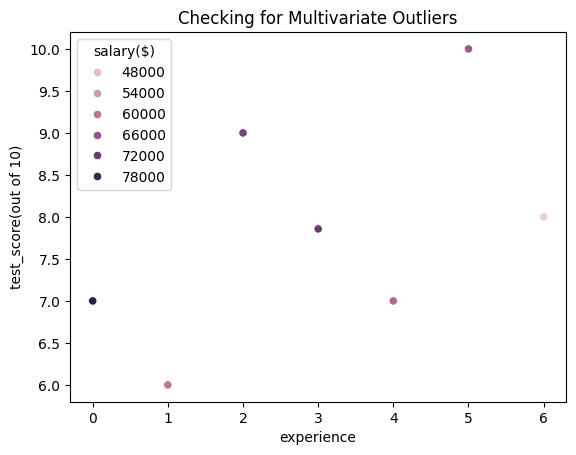

In [36]:
sns.scatterplot(x="experience", y="test_score(out of 10)", data=df, hue="salary($)")
plt.title("Checking for Multivariate Outliers")
plt.show()


In [37]:
X = df.drop('salary($)', axis=1)
y = df['salary($)']

In [39]:
X_train , X_test , y_train, y_test = train_test_split(X,y,test_size = 0.2, random_state = 42)

In [42]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [43]:
model = LinearRegression()

In [44]:
model.fit(X_train, y_train)

LinearRegression()

In [48]:
y_pred = model.predict(X_test)
y_pred

array([47096.96600091, 57753.77344107])

In [54]:
accuracy_score = model.score(X_test, y_test)
print("Accuracy Score:", accuracy_score)

Accuracy Score: 0.844790959178362


Decision Tree

In [67]:

dt_model = DecisionTreeClassifier(
    criterion="gini",
    max_depth=4,
    random_state=42
)

dt_model.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=4, random_state=42)

In [68]:
y_pred2 = dt_model.predict(X_test)
y_pred2


array([70000, 80000])

In [70]:
accuracy_score = dt_model.score(X_test, y_test)
print("Accuracy Score:", accuracy_score)

Accuracy Score: 0.0


TypeError: 'float' object is not callable